In [10]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

CLOCK = 12.5
DRIFT_VEL = 5.2

In [41]:
file = h5py.File("../data/clean/runs/clean_run_0130.h5", "r")

In [42]:
dataset = file["/clean"]

In [43]:
n_events = len(dataset)
print(n_events)

46447


In [50]:
disc = np.load("../data/clean/discarded/discarded_events_0170.npy")
disc.shape

(12399,)

In [45]:
for i in dataset:
    dataset[str(i)]

(-275, 275)

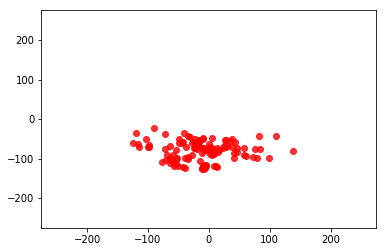

In [117]:
#xyz = dataset["6745"]
xyz = dataset[str(3122)]
a = np.array(xyz)
to_del = []

filtered_1 = a[a[:, 6] <10]
filtered_2 = a[(a[:, 2]*DRIFT_VEL/CLOCK) < 1250]
filtered_3 = a[a[:, 5] > 1]

fig, ax = plt.subplots()
#ax.scatter(a[:,0], a[:,1])
ax.scatter(filtered_1[:,0], filtered_1[:,1], c="r", alpha=0.8)
#ax.scatter(filtered_2[:,0], filtered_2[:,1], c="g", alpha=0.4)
#ax.scatter(filtered_3[:,0], filtered_3[:,1], c="y", alpha=0.3)

plt.ylim((-275, 275)) 
plt.xlim((-275, 275))

In [18]:
len(filtered_3)

0

(-275, 275)

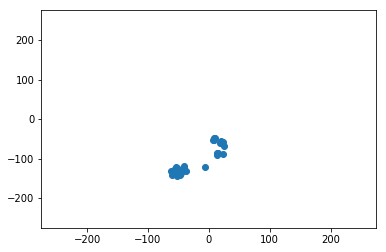

In [15]:
plt.scatter(filtered_3[:,0], filtered_3[:,1])
plt.ylim((-275, 275)) 
plt.xlim((-275, 275))

In [147]:
import pandas as pd
labels_run = pd.read_csv("../labels/run_0130_labels.csv")
index_labels = labels_run["evt_id"].values.astype(str)

In [144]:
labels_run.head()

,evt_id,label,iffy
0,0,j,NaN
1,1,j,NaN
2,2,j,NaN
3,3,j,NaN
4,4,j,NaN


In [155]:
from joblib import Parallel, delayed 

an_array = np.zeros(400)

def func(i):
    print("what?")
    an_array[i] = 45
    
_ = Parallel(n_jobs=4)(delayed(func)(i) for i in range(len(an_array)))

In [118]:
evts = np.load("../data/clean/images/run_0130_label_False_size_80.npy")

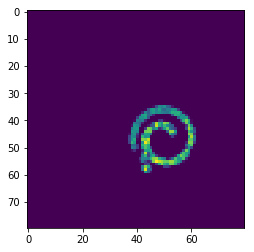

In [135]:
plt.imshow(evts[16].reshape((80, 80)))

In [74]:
np.load("../data/clean/targets/train_targets_size_50.npy").shape

(890,)